In [53]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import j

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [19]:
# Find the most recent date in the data set.
most_recent = session.query(func.max(measurement.date)).scalar()
most_recent

'2017-08-23'

In [27]:
most_recent_row = session.query(measurement).filter(measurement.date == most_recent)
most_recent_row

for row in most_recent_row:
    print(str(row.prcp) + str(row.tobs) + str(row.id) + str(row.date) + str(row.station))

0.081.027242017-08-23USC00519397
0.082.076352017-08-23USC00514830
0.0882.0121872017-08-23USC00519523
0.4576.0195502017-08-23USC00516128


<Axes: >

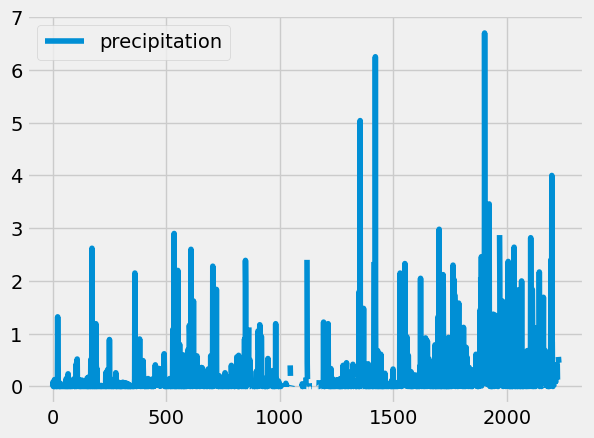

In [58]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database.
# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores
dates = []
precipitation = []

data = session.query(measurement).filter(measurement.date.between('2016-08-23', '2017-08-23'))

for row in data:
    dates.append(row.date)
    precipitation.append(row.prcp)

# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_df = pd.DataFrame({'date': dates, 'precipitation': precipitation})

# Use Pandas Plotting with Matplotlib to plot the data
plot = prcp_df.plot()
plot

In [33]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [41]:
# Design a query to calculate the total number of stations in the dataset
count = session.query(station.station).count()
count

9

In [43]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active = session.query(measurement.station, func.count(measurement.id)).group_by(measurement.station).order_by(func.count(measurement.id).desc()).all()

print(most_active)

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [44]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temps = session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).filter(measurement.station == 'USC00519281').one()

print(temps)

(54.0, 85.0, 71.66378066378067)


<Axes: ylabel='Frequency'>

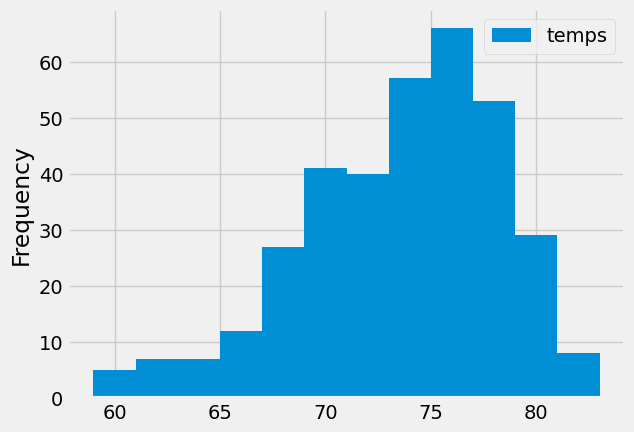

In [51]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
dates = []
temps = []

results = session.query(measurement.date, measurement.tobs).filter(measurement.station == 'USC00519281', measurement.date.between('2016-08-23', '2018-08-23'))

for row in results:
    dates.append(row.date)
    temps.append(row.tobs)

temps_df = pd.DataFrame({'dates': dates, 'temps': temps})

plot = temps_df.plot(kind='hist', bins=12)
plot

# Close Session

In [52]:
# Close Session
session.close()